<a href="https://colab.research.google.com/github/abijith007/Bosch/blob/main/Cifar_10_model_steal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 
from keras import backend as K 


In [2]:
from keras.datasets import cifar10
# let's load data 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
#normalizing inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [4]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [5]:
# Create the model 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [7]:
# Compile model 
lrate = 0.01 
epochs = 100
decay = lrate/epochs 
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=1) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
1563/1563 [==============================] - 60s 19ms/step - loss: 2.0612 - accuracy: 0.2305 - val_loss: 1.5291 - val_accuracy: 0.4414
Epoch 2/100
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4841 - accuracy: 0.4620 - val_loss: 1.2667 - val_accuracy: 0.5344
Epoch 3/100
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2629 - accuracy: 0.5402 - val_loss: 1.1078 - val_accuracy: 0.6009
Epoch 4/100
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0735 - accuracy: 0.6181 - val_loss: 0.9527 - val_accuracy: 0.6626
Epoch 5/100
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9512 - accuracy: 0.6642 - val_loss: 0.8690 - val_accuracy: 0.6976
Epoch 6/100
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8224 - accuracy: 0.7082 - val_loss: 0.8258 - val_accuracy: 0.7134
Epoch 7/100
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7513 - accuracy: 0.7352 - val_loss: 0

In [9]:
import numpy as np

actual = []

for i in range(len(X_test)):
  test_image =np.expand_dims(X_test[i], axis =0) 
  result = model.predict(test_image).argmax() 
  if result==0: 
      actual.append("Aeroplane") 
  elif result==1: 
      actual.append('Automobile') 
  elif result==2: 
      actual.append('Bird') 
  elif result==3: 
      actual.append('Cat') 
  elif result==4: 
      actual.append('Deer') 
  elif result==5: 
      actual.append('Dog') 
  elif result==6: 
      actual.append('Frog') 
  elif result==7: 
      actual.append('Horse') 
  elif result==8: 
      actual.append('Ship') 
  elif result==9: 
      actual.append('Truck') 




print(actual,y_test[0])


['Cat', 'Ship', 'Ship', 'Aeroplane', 'Frog', 'Frog', 'Automobile', 'Cat', 'Cat', 'Automobile', 'Aeroplane', 'Truck', 'Dog', 'Horse', 'Truck', 'Ship', 'Dog', 'Horse', 'Ship', 'Frog', 'Truck', 'Bird', 'Aeroplane', 'Truck', 'Deer', 'Dog', 'Deer', 'Aeroplane', 'Truck', 'Frog', 'Frog', 'Dog', 'Bird', 'Deer', 'Truck', 'Ship', 'Deer', 'Automobile', 'Truck', 'Dog', 'Deer', 'Frog', 'Cat', 'Frog', 'Aeroplane', 'Truck', 'Cat', 'Truck', 'Horse', 'Frog', 'Truck', 'Ship', 'Cat', 'Cat', 'Ship', 'Ship', 'Horse', 'Cat', 'Cat', 'Cat', 'Horse', 'Cat', 'Frog', 'Cat', 'Frog', 'Bird', 'Automobile', 'Bird', 'Cat', 'Horse', 'Bird', 'Frog', 'Ship', 'Ship', 'Truck', 'Bird', 'Aeroplane', 'Cat', 'Cat', 'Ship', 'Ship', 'Automobile', 'Automobile', 'Horse', 'Bird', 'Horse', 'Aeroplane', 'Horse', 'Ship', 'Truck', 'Aeroplane', 'Bird', 'Ship', 'Frog', 'Deer', 'Frog', 'Frog', 'Ship', 'Aeroplane', 'Horse', 'Deer', 'Dog', 'Frog', 'Cat', 'Automobile', 'Automobile', 'Cat', 'Frog', 'Ship', 'Horse', 'Deer', 'Aeroplane', 'Bird

In [10]:
predicted = []

for i in range(len(y_test)):
  if y_test[i].argmax()==0: 
      predicted.append("Aeroplane") 
  elif y_test[i].argmax()==1: 
      predicted.append('Automobile') 
  elif y_test[i].argmax()==2: 
      predicted.append('Bird') 
  elif y_test[i].argmax()==3: 
      predicted.append('Cat') 
  elif y_test[i].argmax()==4: 
      predicted.append('Deer') 
  elif y_test[i].argmax()==5: 
      predicted.append('Dog') 
  elif y_test[i].argmax()==6: 
      predicted.append('Frog') 
  elif y_test[i].argmax()==7: 
      predicted.append('Horse') 
  elif y_test[i].argmax()==8: 
      predicted.append('Ship') 
  elif y_test[i].argmax()==9: 
      predicted.append('Truck') 


print(len(actual),len(predicted))

10000 10000


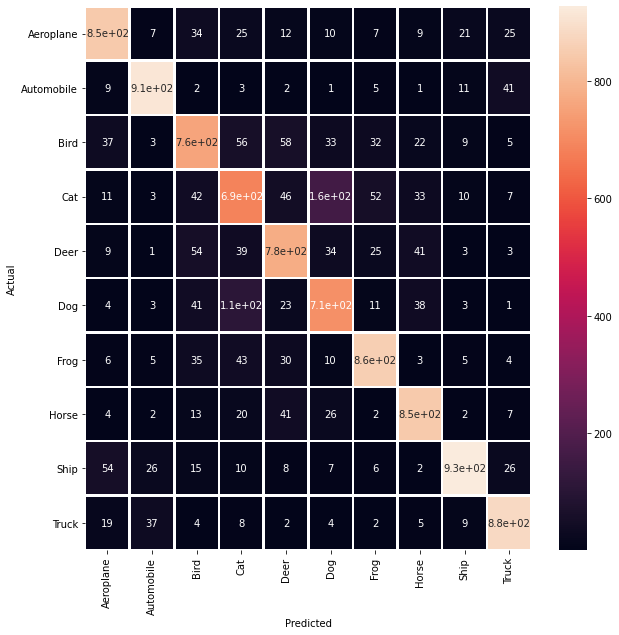

In [11]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    actual,
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

fig, ax = plt.subplots(figsize=(10,10))  
sn.heatmap(confusion_matrix, annot=True, linewidths=1.5)
plt.show()

In [12]:
from sklearn.metrics import classification_report
target_names = ['Aeroplane', 'Automobile', 'Bird','Cat','Deer','Dog', 'Frog','Horse', 'Ship', 'Truck']
print(classification_report(actual, predicted, target_names=target_names))

              precision    recall  f1-score   support

   Aeroplane       0.85      0.85      0.85       997
  Automobile       0.91      0.92      0.92       988
        Bird       0.76      0.75      0.75      1015
         Cat       0.69      0.65      0.67      1052
        Deer       0.78      0.79      0.78       987
         Dog       0.71      0.75      0.73       947
        Frog       0.86      0.86      0.86       999
       Horse       0.85      0.88      0.86       963
        Ship       0.93      0.86      0.89      1081
       Truck       0.88      0.91      0.89       971

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [13]:
from keras.models import load_model 
model.save('cifar-10_original_model.h5')

In [14]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('cifar-10_original_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmprfvk5par/assets


In [15]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [16]:
#!ls drive/MyDrive/Bosch
#!cp cifar-10_original_model.h5 drive/MyDrive/Bosch/
#!cp cifar-10_original_model.tflite drive/MyDrive/Bosch/
#!ls drive/MyDrive/Bosch

[[[0.61960787 0.4392157  0.19215687]
  [0.62352943 0.43529412 0.18431373]
  [0.64705884 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254903 0.14117648]
  [0.49411765 0.35686275 0.14117648]
  [0.45490196 0.33333334 0.12941177]]

 [[0.59607846 0.4392157  0.2       ]
  [0.5921569  0.43137255 0.15686275]
  [0.62352943 0.44705883 0.1764706 ]
  ...
  [0.53333336 0.37254903 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509805 0.13333334]]

 [[0.5921569  0.43137255 0.18431373]
  [0.5921569  0.42745098 0.12941177]
  [0.61960787 0.43529412 0.14117648]
  ...
  [0.54509807 0.38431373 0.13333334]
  [0.50980395 0.37254903 0.13333334]
  [0.47058824 0.34901962 0.12941177]]

 ...

 [[0.26666668 0.4862745  0.69411767]
  [0.16470589 0.39215687 0.5803922 ]
  [0.12156863 0.34509805 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254905]
  [0.05098039 0.2509804  0.42352942]
  [0.15686275 0.33333334 0.49803922]]

 [[0.23921569 0.45490196 0.65882355]
  [0.19215687 0.4        0.5803922 ]


##**Model steal**


Label generation of noisy input using original model


In [213]:
import numpy as np
import os
import cv2

In [214]:
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.7
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = np.random.randint(low=0,high=124,size=1)

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = np.random.randint(low=124,high=255,size=1)
      return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

In [215]:
(x_train_rLabel, y_train_rLabel), (x_test_rLabel, y_test_rLabel) = cifar10.load_data()

In [216]:
percentage = 5
num_of_img = int(len(x_train_rLabel)*(percentage/100))
print(num_of_img)
x_train_noise = []
for i in range(num_of_img):
  x_train_noise.append(x_train_rLabel[i])

x_train_noise = np.array(x_train_noise)

2500


In [217]:
for i in range(num_of_img):
  x_train_noise[i] = noisy('s&p',x_train_noise[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [189]:
print(x_train_rLabel.shape )


(50000, 32, 32, 3)


In [218]:
print(x_train_noise.shape)

(2500, 32, 32, 3)


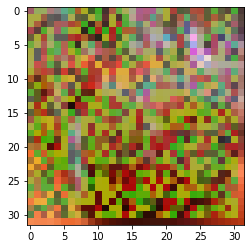

In [219]:
plt.imshow(x_train_noise[5])

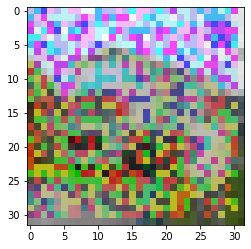

In [220]:
plt.imshow(x_train_noise[16])

In [221]:
rLabels=[]

for i in range(num_of_img):
  test_image =np.expand_dims(x_train_noise[i], axis =0)
  rLabels.append([model.predict(test_image).argmax()])



RuntimeError: ignored

In [194]:
rLabels = np.array(rLabels)
print(rLabels.shape)

(500, 1)


In [195]:
#normalizing inputs from 0-255 to 0.0-1.0 
x_train_noise = x_train_noise.astype('float32') 
rLabels = rLabels.astype('float32') 
x_train_noise = x_train_noise / 255.0 
x_test_rLabel = x_test_rLabel / 255.0

rLabels = np_utils.to_categorical(rLabels) 
y_test_rLabel = np_utils.to_categorical(y_test_rLabel) 
num_classes = 10

print(rLabels.shape)

(500, 10)


Model training of the generated input with labels

In [196]:
model_steal = Sequential()
model_steal.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model_steal.add(Dropout(0.2)) 
model_steal.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model_steal.add(MaxPooling2D(pool_size=(2, 2))) 
model_steal.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model_steal.add(Dropout(0.2)) 
model_steal.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model_steal.add(MaxPooling2D(pool_size=(2, 2))) 
model_steal.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model_steal.add(Dropout(0.2))
model_steal.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model_steal.add(Dropout(0.4)) 
model_steal.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model_steal.add(MaxPooling2D(pool_size=(2, 2))) 
model_steal.add(Flatten()) 
model_steal.add(Dropout(0.2)) 
model_steal.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model_steal.add(Dropout(0.2)) 
model_steal.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model_steal.add(Dropout(0.2)) 
model_steal.add(Dense(num_classes, activation='softmax'))
print(model_steal.summary())

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f1026647950>>


In [197]:
print(x_train_noise.shape, rLabels.shape)
print(X_train.shape, y_train.shape)

(500, 32, 32, 3) (500, 10)
(50000, 32, 32, 3) (50000, 1)


In [198]:
from keras.preprocessing.image import ImageDataGenerator

opt = SGD(lr=0.001, momentum=0.9)
model_steal.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(x_train_noise, rLabels, batch_size=64)
steps = int(x_train_noise.shape[0] / 64)
history = model_steal.fit_generator(it_train, steps_per_epoch=steps, epochs=200, validation_data=(x_test_rLabel, y_test_rLabel), verbose=1)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


7/7 [==============================] - 4s 486ms/step - loss: 2.3019 - accuracy: 0.0889 - val_loss: 2.3026 - val_accuracy: 0.0960
Epoch 2/200
7/7 [==============================] - 2s 387ms/step - loss: 2.2683 - accuracy: 0.2173 - val_loss: 2.3028 - val_accuracy: 0.0890
Epoch 3/200
7/7 [==============================] - 2s 392ms/step - loss: 2.2210 - accuracy: 0.2716 - val_loss: 2.3039 - val_accuracy: 0.0823
Epoch 4/200
7/7 [==============================] - 2s 385ms/step - loss: 2.1467 - accuracy: 0.3026 - val_loss: 2.3089 - val_accuracy: 0.0945
Epoch 5/200
7/7 [==============================] - 2s 390ms/step - loss: 2.0336 - accuracy: 0.2968 - val_loss: 2.3355 - val_accuracy: 0.1000
Epoch 6/200
7/7 [==============================] - 2s 388ms/step - loss: 1.8616 - accuracy: 0.2715 - val_loss: 2.4475 - val_accuracy: 0.1000
Epoch 7/200
7/7 [==============================] - 2s 395ms/step - loss: 1.8443 - accuracy: 0.3151 - val_loss: 2.4436 - val_accuracy: 0.1000
Epoch 8/200
7/7 [========

In [212]:
# Final evaluation of the model 
scores = model_steal.evaluate(x_test_rLabel, y_test_rLabel, verbose=1) 
print("Accuracy: %.2f%%" % (scores[1]*100))

RuntimeError: ignored

In [211]:
import numpy as np

actual_stolen = []
print(x_train_noise.shape , len(x_train_noise))
for i in range(len(x_train_noise)):
  test_image =np.expand_dims(x_train_noise[i], axis =0) 
  result = model_steal.predict(test_image)
  result=result.argmax()
  if result==0: 
      actual_stolen.append("Aeroplane") 
  elif result==1: 
      actual_stolen.append('Automobile') 
  elif result==2: 
      actual_stolen.append('Bird') 
  elif result==3: 
      actual_stolen.append('Cat') 
  elif result==4: 
      actual_stolen.append('Deer') 
  elif result==5: 
      actual_stolen.append('Dog') 
  elif result==6: 
      actual_stolen.append('Frog') 
  elif result==7: 
      actual_stolen.append('Horse') 
  elif result==8: 
      actual_stolen.append('Ship') 
  elif result==9: 
      actual_stolen.append('Truck') 



RuntimeError: ignored

In [ ]:
print(y_test_rLabel[0], actual_stolen.shape)
print(actual_stolen)

In [203]:
predicted = []

for i in range(len(rLabels)):
  if y_test[i].argmax()==0: 
      predicted.append("Aeroplane") 
  elif y_test[i].argmax()==1: 
      predicted.append('Automobile') 
  elif y_test[i].argmax()==2: 
      predicted.append('Bird') 
  elif y_test[i].argmax()==3: 
      predicted.append('Cat') 
  elif y_test[i].argmax()==4: 
      predicted.append('Deer') 
  elif y_test[i].argmax()==5: 
      predicted.append('Dog') 
  elif y_test[i].argmax()==6: 
      predicted.append('Frog') 
  elif y_test[i].argmax()==7: 
      predicted.append('Horse') 
  elif y_test[i].argmax()==8: 
      predicted.append('Ship') 
  elif y_test[i].argmax()==9: 
      predicted.append('Truck') 


print(len(actual),len(predicted))

10000 500


In [204]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    actual,
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

fig, ax = plt.subplots(figsize=(10,10))  
sn.heatmap(confusion_matrix, annot=True, linewidths=1.5)
plt.show()

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Aeroplane', 'Automobile', 'Bird','Cat','Deer','Dog', 'Frog','Horse', 'Ship', 'Truck']
print(classification_report(actual, predicted, target_names=target_names))

In [ ]:
from keras.models import load_model 
model.save('cifar-10_stolen_model.h5')

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('cifar-10_stolen_model.tflite', 'wb') as f:
  f.write(tflite_model)


*   1% = 500 images ==> 13.32 % accuracy
*   2% = 1000 images ==> % accuracy
*   3% = 1500 images ==> % accuracy
*   4% = 2000 images ==> % accuracy
*   5% = 2500 images ==> % accuracy
*   6% = 3000 images ==> % accuracy
* 7% = 3500 images ==> % accuracy
* 8% = 4000 images ==> % accuracy
* 9% = 4500 images ==> % accuracy
* 10% = 5000 images ==> % accuracy




